In [2]:
# Objective : To predict which passengers survived and which did not.

# Output : A csv file with passernger id and survival status. 

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('train.csv')

df_test = pd.read_csv('test.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Tasks:

1. Understand data. (Plots, text)

2. Clean data (Remove unnecessary columns, impute nan values).

3. Encode categorical vars

4. Feature Engineering

5. Build Models

6. Spotcheck

7. Tune Hyperparams - simple param tuning using small range of params.

8. Extensive Param tuning - (If results of step 7 are okay)

8. Report results and best model



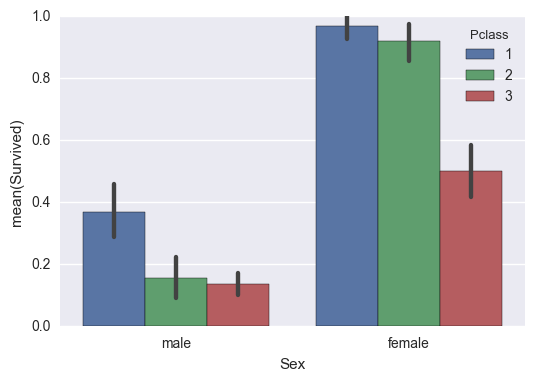

In [4]:
# Plotting Survived vs Pclass, Sex, Age, Embarked, Fare

# Learn Plotting on my own

%matplotlib inline 

sns.barplot(x = df['Sex'], y= df['Survived'], hue = df['Pclass'])

In [5]:
# Observation 1: Females survived more than males.   *feature = Sex
# Observation 2: Class 1 people had a better survival rate than other classes.  *feature = Pclass

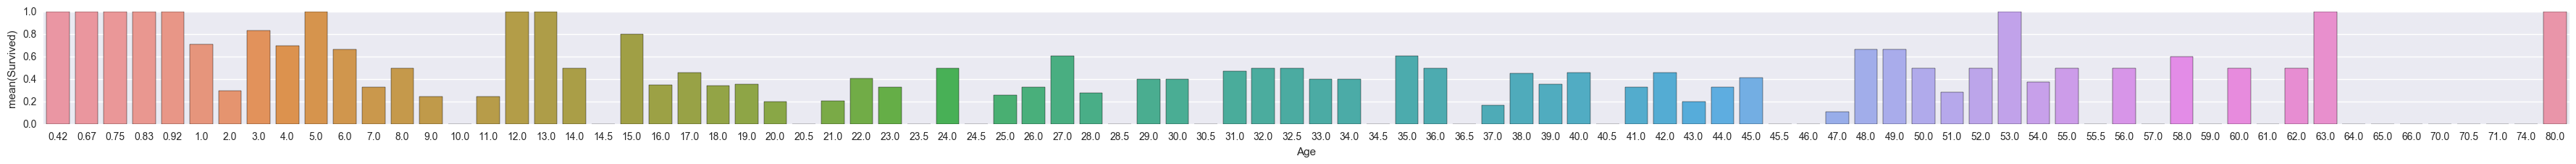

In [6]:
a4_dims = (45, 2)
# df = mylib.load_data()
fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(x= df['Age'], y = df['Survived'], ci = 10, ax= ax)

In [7]:
# Observation 3: People aged between 16 to 52 had lower survival rate than others. *feature = age

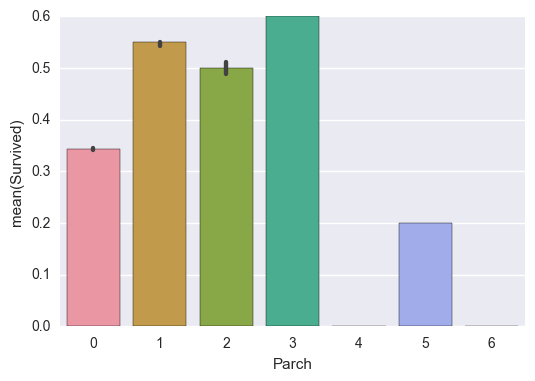

In [8]:
sns.barplot(x = df['Parch'], y= df['Survived'], ci = 10)

In [9]:
# Observation 4: Those who had 1 or 2 or 3 (Parents/Children) had a better survival rate. *feature = Parch

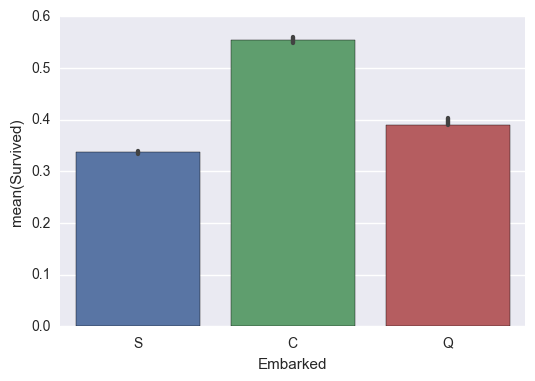

In [10]:
sns.barplot(x = df['Embarked'], y= df['Survived'], ci = 10)

In [11]:
# Observation 5: Those who embarked from C had a better survival rate. *feature = Embarked

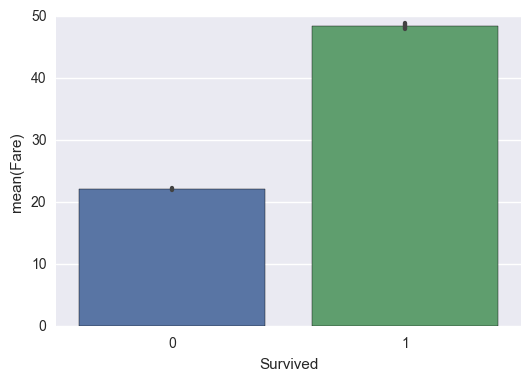

In [12]:
sns.barplot(y = df['Fare'], x= df['Survived'], ci = 10)

In [13]:
# Observation 6: Those who paid fares above 25 survived. *feature = Fare

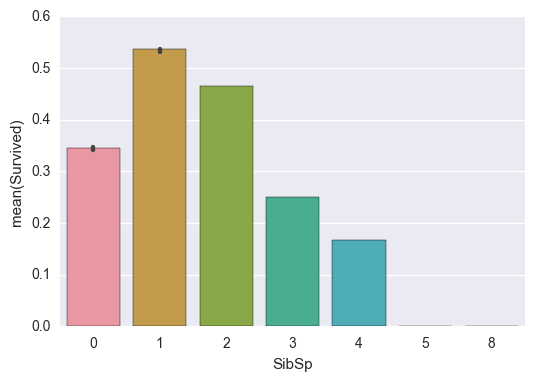

In [14]:
sns.barplot(x = df['SibSp'], y= df['Survived'], ci = 10)

In [15]:
# Observation 7: Those who had 1 or 2 (Siblings or spouse) had a better survival chance. 

In [16]:
# From preliminary observations Key features are:
# Key Features = {Age, Pclass, Fare, Embarked, Parch, SibSp}

## Cleaning Data

1. Remove unnecessary columns
2. Drop/Impute NaNs

In [17]:
# Removing Passenger id, Name, cabin, Ticket

df_clean = df.drop(['PassengerId','Ticket', 'Name', 'Cabin'], axis = 1) 

df_clean.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [18]:
df_clean_test = df_test.drop(['PassengerId','Ticket', 'Name', 'Cabin'], axis = 1) 

df_clean_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S


In [19]:
# Null values 
df_clean.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [20]:
# Age and Embarked have null values.

# Filling NaNs in age with mean age

# imr = Imputer(missing_values='NaN', strategy='mean', axis = 1)
# imr = imr.fit(df_clean['Age'])
# imputed_data = imr.transform(df_clean['Age'].values)
# df_clean['Age'] = pd.DataFrame(imputed_data[0])

df_clean['Age'].fillna(df_clean['Age'].mean(), inplace = True)
df_clean_test['Age'].fillna(df_clean_test['Age'].mean(), inplace = True)

df_clean_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [21]:
df_clean_test['Fare'].fillna(df_clean_test['Fare'].mean(), inplace = True)
df_clean_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
df_clean.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [23]:
# Fillin missing embarked value with most common value

df_clean['Embarked'].fillna(df_clean['Embarked'].value_counts().index[0], inplace = True)
df_clean.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [25]:
df_clean.iloc[[829]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
829,1,1,female,62.0,0,0,80.0,S


In [26]:
df_clean.iloc[[61]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,S


## Encode categorical variables

Sex, Embarked

In [27]:
df_en = pd.get_dummies(df_clean[['Sex', 'Embarked','Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']])
df_en_test = pd.get_dummies(df_clean_test[['Sex', 'Embarked','Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

In [28]:
df_en.head(2)

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0


In [29]:
df_en_test.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1


In [30]:
X_train = df_en.drop('Survived', axis=1)
y_train = df_en['Survived']
X_test = df_en_test.copy()

In [31]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

0.98204264870931535

In [32]:
# Feature Selection

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, step=1, n_features_to_select=5)
rfe.fit(X_train, y_train)

print("Optimal number of features : %d" % rfe.n_features_)

rfe.ranking_

logrfe= sorted([(feature,rank) for rank, feature in zip(rfe.ranking_,X_train.columns.values)], key=lambda x: x[1])
for feature, rank in logrfe[0:5]:
    print('{:<15} {}'.format(feature, rank))

Optimal number of features : 5
Pclass          1
Sex_female      1
Sex_male        1
Embarked_C      1
Embarked_Q      1


In [33]:
dectree = DecisionTreeClassifier()

rfe = RFE(estimator=dectree, step=1, n_features_to_select=5)
rfe.fit(X_train, y_train)

print("Optimal number of features : %d" % rfe.n_features_)

rfe.ranking_

logrfe= sorted([(feature,rank) for rank, feature in zip(rfe.ranking_,X_train.columns.values)], key=lambda x: x[1])
for feature, rank in logrfe[0:5]:
    print('{:<15} {}'.format(feature, rank))

Optimal number of features : 5
Pclass          1
Age             1
SibSp           1
Fare            1
Sex_female      1


In [34]:
rf = RandomForestClassifier()

rfe = RFE(estimator=rf, step=1, n_features_to_select=5)
rfe.fit(X_train, y_train)

print("Optimal number of features : %d" % rfe.n_features_)

rfe.ranking_

logrfe= sorted([(feature,rank) for rank, feature in zip(rfe.ranking_,X_train.columns.values)], key=lambda x: x[1])
for feature, rank in logrfe[0:5]:
    print('{:<15} {}'.format(feature, rank))

Optimal number of features : 5
Pclass          1
Age             1
Fare            1
Sex_female      1
Sex_male        1


Pclass, Age, Fare, Sex_female




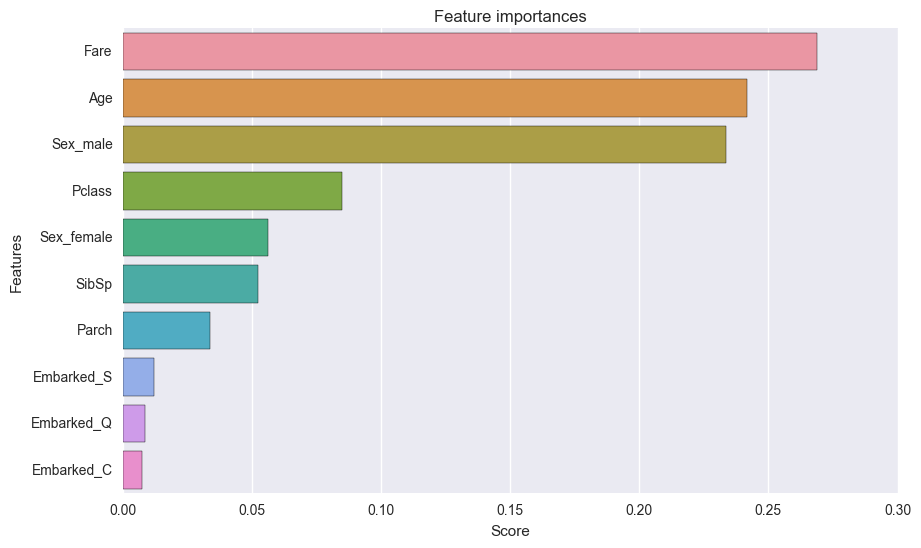

In [35]:
rf.fit(X_train, y_train)
rf.feature_importances_

rf_features = sorted([(feature, imp) for feature, imp in zip(X_train.columns, rf.feature_importances_)],
                     key = lambda x:x[1], reverse=True)

# for feature, importance in rf_features[::-1]:
#     print('{:<15} {:0.2}'.format(feature, importance))

a5_dims = (10, 6)
# df = mylib.load_data()
fig, ax = plt.subplots(figsize=a5_dims)    
    
features = list(zip(*rf_features))[0]
importances = list(zip(*rf_features))[1]
    
sns.barplot(importances,features, ax=ax)
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature importances')


In [36]:
# Let's see if any features can be removed keeping accuracy the same.

X_train_new = X_train[['Fare','Age','Sex_female','Sex_male','Pclass', 'SibSp', 'Parch', 'Embarked_S']]

random_forest1 = RandomForestClassifier(n_estimators=100)

random_forest1.fit(X_train_new, y_train)

Y_pred = random_forest.predict(X_test)

random_forest1.score(X_train_new, y_train)

0.98092031425364756

In [53]:
X_test_new = X_test.drop(['Embarked_C', 'Embarked_Q'], axis = 1)
X_test_new.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_S'],
      dtype='object')

In [69]:
# Rough logistic 
logreg = LogisticRegression()
logreg.fit(X_train_new, y_train)
logreg.score(X_train_new, y_train)







randfor = RandomForestClassifier()
dectree = DecisionTreeClassifier()
# knn = KNeighborsClassifier()
# supvec = SVC(kernel = 'linear')



In [40]:
# clfs = [('Logistic Regression',logreg),('Random Forest', randfor), ('Decision Tree',dectree),('K Nearest', knn)]

# def spotcheck(clfs, x, y):
#     return {clf[0]:int(round((cross_val_score(clf[1], x, y, cv=StratifiedKFold(9)).mean()), 3)*100) for clf in clfs}

In [ ]:
# spotcheck(clfs, X_train, y_train)

In [41]:
# spotcheck(clfs, X_train[['Pclass','Age','Fare','Sex_female']], y_train)


# Hyper-parameter tuning

In [44]:
# Decision tree
tree_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

grid_tree = GridSearchCV(dectree, param_grid = tree_grid, cv=20, n_jobs=-1)

In [46]:
grid_tree.fit(X_train_new, y_train)

GridSearchCV(cv=20, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [None, 2, 5, 10], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10], 'max_leaf_nodes': [None, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [47]:
dectree_opt =  grid_tree.best_estimator_

grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_samples_split': 20}

In [48]:
cross_val_score(dectree_opt, X_train_new, y_train, n_jobs=-1, cv = 10).mean()

0.81944728180683235

In [60]:
Y_pred1 = dectree_opt.predict(X_test_new)

In [75]:
# Random Forest
ranfo_grid = {
              "max_depth": [3, None],
              "max_features": [1, 3, 8],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_rf = GridSearchCV(randfor, param_grid = ranfo_grid, cv=20, n_jobs=-1)

In [76]:
grid_rf.fit(X_train_new, y_train)

GridSearchCV(cv=20, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, None], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 10], 'max_features': [1, 3, 8], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [77]:
grid_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [80]:
grid_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [82]:
Y = grid_rf.predict(X_test_new)

In [83]:
l = list(Y)

In [86]:
l.count(1)

48

In [88]:
cross_val_score(grid_rf, X_train_new, y_train, cv = 10).mean()

0.82280473272046317

In [87]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y
    })
submission.to_csv('titanic2.csv', index=False)

In [66]:
k = list(Y_pred1)

In [67]:
k.count(0)

279

In [68]:
k.count(1)

139